In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import bz2
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [133]:
# Members of the intersection of both the 115th and 116th US Congress
# All of these members where there during the whole 2016-2020 period (both 115th & 116th congress)
congress = pd.read_csv("/content/drive/MyDrive/ADA/congress_115_116.csv")

In [134]:
congress.head()

,Unnamed: 0,fec_candidate_id,speaker,short_title,last_name,first_name,party,date_of_birth,gender,state
0,0,H4LA05221,ralph abraham,Rep.,Abraham,Ralph,R,1954-09-16,M,LA
1,1,H4NC12100,alma adams,Rep.,Adams,Alma,D,1946-05-27,F,NC
2,2,H6AL04098,robert aderholt,Rep.,Aderholt,Robert,R,1965-07-22,M,AL
3,3,H2CA31125,pete aguilar,Rep.,Aguilar,Pete,D,1979-06-19,M,CA
4,4,H2GA12121,rick allen,Rep.,Allen,Rick,R,1951-11-07,M,GA


In [135]:
%%time 
# link to the Drive repo + the year of the newpapers quotes
path_to_file = '/content/drive/MyDrive/ADA/quotes-2019-congress-speakers.json.bz2'
# here the data is in the ADA folder placed at the root of your Drive

quotes_2019_congress = []
with bz2.open(path_to_file, 'rb') as s_file:
    for i, sample in enumerate(s_file):
      quote = json.loads(sample)
      quotes_2019_congress.append(quote)

CPU times: user 31.7 s, sys: 2.38 s, total: 34.1 s
Wall time: 34 s


In [136]:
# Transforming the array of quotes in a pandas DataFrame
df_2019_congress = pd.DataFrame(quotes_2019_congress)
df_2019_congress.head()
df_2019_congress

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2019-06-28-043094,It is my view that the answer to their problem...,Marco Rubio,[Q324546],2019-06-28 21:54:17,1,"[[Marco Rubio, 0.7263], [None, 0.2737]]",[http://www.breitbart.com/politics/2019/06/28/...,E
1,2019-08-12-040085,It looked wonderful. I wish I was there.,Bill Johnson,"[Q16204402, Q17385655, Q17626755, Q21585452, Q...",2019-08-12 09:16:52,1,"[[Bill Johnson, 0.5411], [None, 0.4285], [Dona...",[https://www.gazettenet.com/Trump-supporters-w...,E
2,2019-11-14-054232,It may be in early December. We don't have a t...,Hakeem Jeffries,[Q5640425],2019-11-14 14:17:35,1,"[[Hakeem Jeffries, 0.487], [None, 0.4868], [Mi...",[http://www.eenews.net/stories/1061544043],E
3,2019-03-21-001139,a destroyer-type midfield boss.,Adam Smith,"[Q14950467, Q16255210, Q20023132, Q22121229, Q...",2019-03-21 19:22:00,1,"[[Adam Smith, 0.8078], [None, 0.1762], [Frank ...",[http://www.fresnobee.com/sports/article228132...,E
4,2019-06-17-001015,A fair and accurate count of every person in A...,Val Demings,[Q7909083],2019-06-17 09:00:00,1,"[[Val Demings, 0.8553], [None, 0.1447]]",[http://www.tbo.com/florida-politics/buzz/2019...,E
...,...,...,...,...,...,...,...,...,...
333506,2019-03-29-048819,I'm here because of so many LGBTQ Americans wh...,CORY BOOKER,[Q1135767],2019-03-29 14:11:00,2,"[[CORY BOOKER, 0.6702], [None, 0.3298]]",[https://www.hrc.org/blog/am-equality-tipsheet...,E
333507,2019-12-18-037868,I'm not an impartial juror. This is a politica...,Mitch McConnell,[Q355522],2019-12-18 11:56:07,2,"[[Mitch McConnell, 0.8392], [None, 0.1473], [C...",[http://cnn.com/politics/live-news/impeachment...,E
333508,2019-10-31-050399,Impeachment as a practical matter is whatever ...,Mitch McConnell,[Q355522],2019-10-31 00:02:09,1,"[[Mitch McConnell, 0.8447], [None, 0.1525], [P...",[http://dallasnews.com/news/politics/2019/10/3...,E
333509,2019-10-30-052703,Isn't that the very definition of a quid pro quo?,Adam Schiff,[Q350843],2019-10-30 17:00:58,14,"[[Adam Schiff, 0.5983], [None, 0.2485], [Bill ...",[https://abc17news.com/news/politics/national-...,E


In [137]:
# Counting the number of quotes by each member of the congress
df_2019_congress["speaker"].str.lower().value_counts()

nancy pelosi        21386
elizabeth warren    21190
lindsey graham      10980
adam schiff         10283
cory booker         10279
                    ...  
e murphy                2
michael burges          2
danny d                 1
e clarke                1
mike j                  1
Name: speaker, Length: 414, dtype: int64

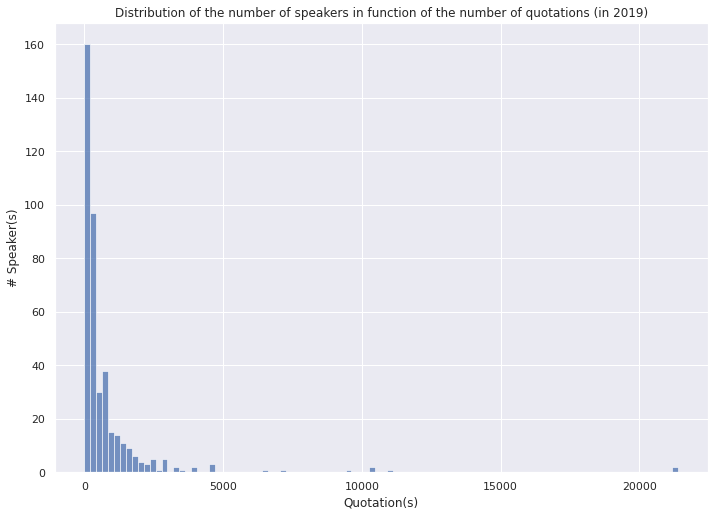

CPU times: user 722 ms, sys: 24.2 ms, total: 746 ms
Wall time: 747 ms


In [138]:
%%time
# Distribution of the number(#) of speakers in function of the # of quotes

ax11 = sns.histplot(data = df_2019_congress["speaker"].str.lower().value_counts(), bins=100)
ax11.set_title('Distribution of the number of speakers in function of the number of quotations (in 2019)')
ax11.set_ylabel('# Speaker(s)')
ax11.set_xlabel('Quotation(s)')
plt.show()

In [139]:
df_2019_congress["speaker"] = df_2019_congress["speaker"].str.lower()
df_2019_congress_merged = pd.merge(df_2019_congress, congress[["speaker", "party", "gender", "date_of_birth", 'state']], on=["speaker"], how='left')
df_2019_congress_merged.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,party,gender,date_of_birth,state
0,2019-06-28-043094,It is my view that the answer to their problem...,marco rubio,[Q324546],2019-06-28 21:54:17,1,"[[Marco Rubio, 0.7263], [None, 0.2737]]",[http://www.breitbart.com/politics/2019/06/28/...,E,R,M,1971-05-28,FL
1,2019-08-12-040085,It looked wonderful. I wish I was there.,bill johnson,"[Q16204402, Q17385655, Q17626755, Q21585452, Q...",2019-08-12 09:16:52,1,"[[Bill Johnson, 0.5411], [None, 0.4285], [Dona...",[https://www.gazettenet.com/Trump-supporters-w...,E,R,M,1954-11-10,OH
2,2019-11-14-054232,It may be in early December. We don't have a t...,hakeem jeffries,[Q5640425],2019-11-14 14:17:35,1,"[[Hakeem Jeffries, 0.487], [None, 0.4868], [Mi...",[http://www.eenews.net/stories/1061544043],E,D,M,1970-08-04,NY
3,2019-03-21-001139,a destroyer-type midfield boss.,adam smith,"[Q14950467, Q16255210, Q20023132, Q22121229, Q...",2019-03-21 19:22:00,1,"[[Adam Smith, 0.8078], [None, 0.1762], [Frank ...",[http://www.fresnobee.com/sports/article228132...,E,D,M,1965-06-15,WA
4,2019-06-17-001015,A fair and accurate count of every person in A...,val demings,[Q7909083],2019-06-17 09:00:00,1,"[[Val Demings, 0.8553], [None, 0.1447]]",[http://www.tbo.com/florida-politics/buzz/2019...,E,D,F,1957-03-12,FL


In [140]:
# Number of quotes for this dataset
quotes_number_2019 = df_2019_congress_merged.shape[0]
print(f' Total number of quotes for congress dataset 2019: {quotes_number_2019}')

 Total number of quotes for congress dataset 2019: 333511


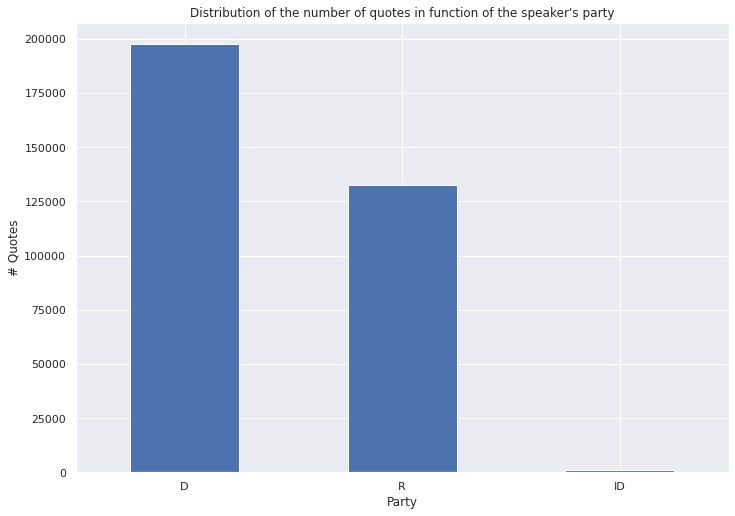

,party
D,197529
R,132556
ID,1149


In [141]:
#-------------------Political party------------------------

df_party = df_2019_congress_merged['party'].value_counts().to_frame()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax2 = df_party.plot(kind='bar', rot=0, legend = False)
ax2.set_title("Distribution of the number of quotes in function of the speaker's party")
ax2.set_ylabel('# Quotes')
ax2.set_xlabel('Party')
plt.show()
df_party

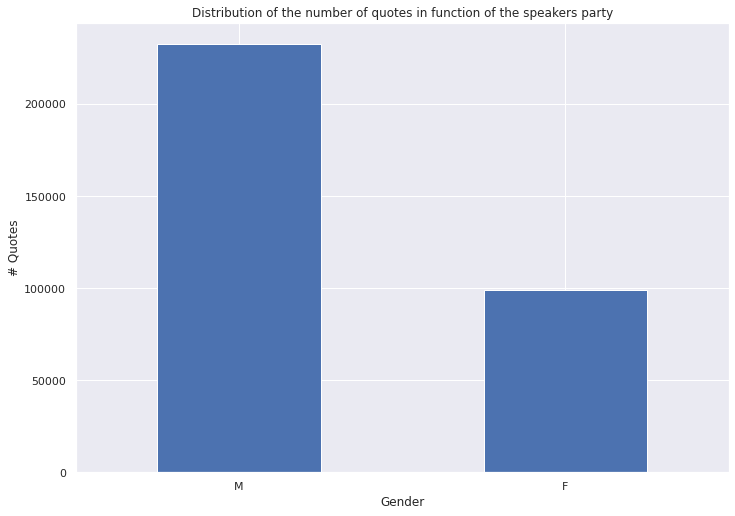

,gender
M,232492
F,98742


In [142]:
#-----------------Gender-----------------

df_gender = df_2019_congress_merged['gender'].value_counts().to_frame()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax3 = df_gender.plot(kind='bar', rot=0, legend = False)
ax3.set_title('Distribution of the number of quotes in function of the speaker''s party')
ax3.set_ylabel('# Quotes')
ax3.set_xlabel('Gender')
plt.show()
df_gender

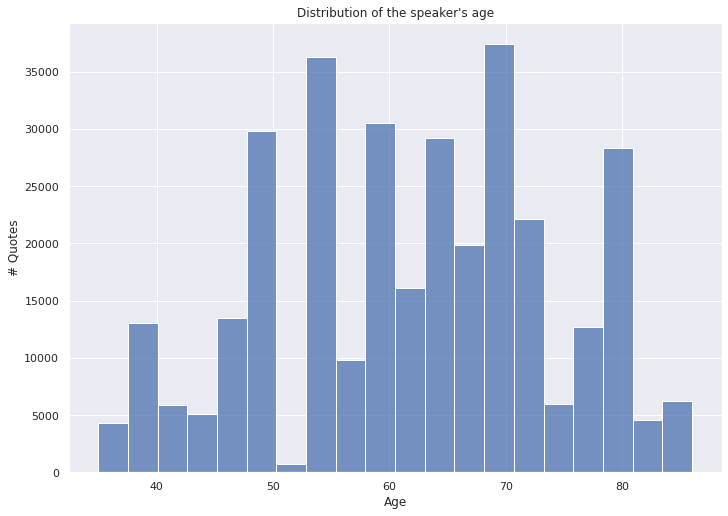

,age
mean,62.015946
50%,64.000000
min,35.000000
max,86.000000


In [143]:
#-----------------Age-----------------

df_2019_congress_merged['year_of_birth'] = pd.DatetimeIndex(df_2019_congress_merged['date_of_birth']).year.astype('Int64')
df_2019_congress_merged['age'] = (2019 - df_2019_congress_merged['year_of_birth']).astype('Int64')
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax3 = sns.histplot(data = df_2019_congress_merged['age'], bins=20)
ax3.set_title("Distribution of the speaker's age")
ax3.set_ylabel('# Quotes')
ax3.set_xlabel('Age')
plt.show()

df_2019_congress_merged.describe().loc[['mean', '50%', 'min', 'max'],['age']]


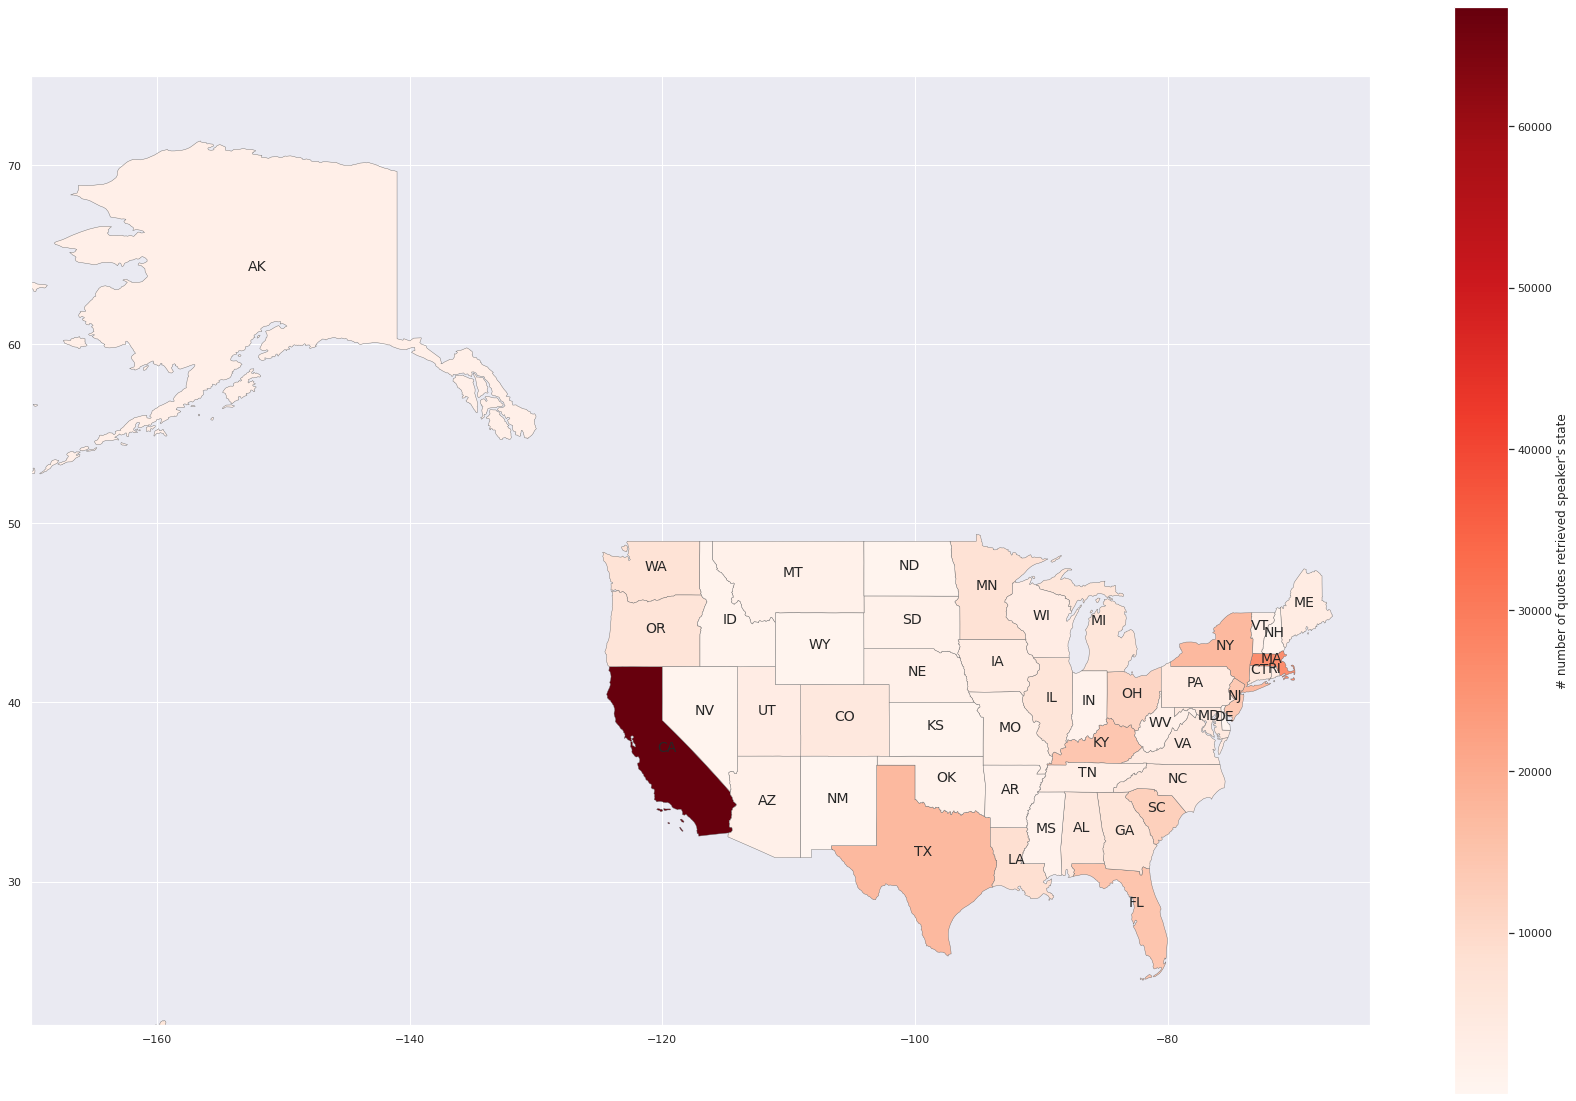

In [144]:
#--------------------State-----------------------
# Heatmap of occurences of state origin of speaker 
#!pip install geopandas
import geopandas as gpd
from geopandas import GeoDataFrame
states_map = gpd.read_file("/content/drive/MyDrive/map/cb_2018_us_state_20m.shp")
# Shapefiles retrieved from the Census Bureau’s MAF/TIGER geographic database 

fig, ax = plt.subplots(1, figsize=(30, 20))
df_state = df_2019_congress_merged['state'].value_counts().to_frame()
merged = df_state.merge(states_map, left_index=True, right_on='STUSPS')
merged = GeoDataFrame(merged)
merged.apply(lambda x: ax.annotate(s=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
merged.plot(column="state", cmap="Reds", ax=ax, linewidth=0.4, edgecolor=".4", legend=True, legend_kwds={'label': "# number of quotes retrieved speaker's state", 'orientation': "vertical"})
_ = ax.set_xlim([-170, -64])
_ = ax.set_ylim([22, 75])


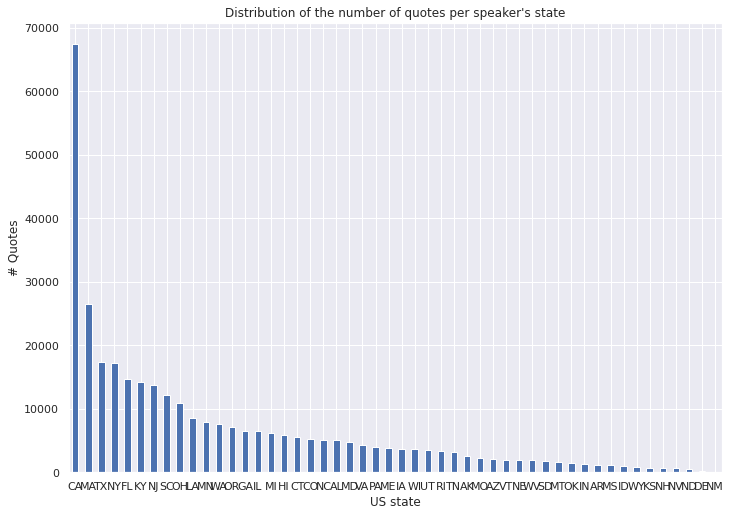

In [145]:
ax2 = df_state.plot(kind='bar', rot=0, legend = False)
ax2.set_title("Distribution of the number of quotes per speaker's state")
ax2.set_ylabel('# Quotes')
ax2.set_xlabel('US state')
plt.show()

In [146]:
# Number of quotes containing the string "climate change"

num_quotes_climate_change = np.count_nonzero(df_2019_congress_merged['quotation'].str.count('climate change'), axis=0)
print(f'Number of quotes containing the string "climate change": {num_quotes_climate_change}')

Number of quotes containing the string "climate change": 1373


In [147]:
# Number of quotes containing the string 'Paris agreement'

num_quotes_paris = np.count_nonzero(df_2019_congress_merged['quotation'].str.count('Paris agreement'), axis=0)
print(f'Number of quotes containing the string "Paris agreement": {num_quotes_paris}')

Number of quotes containing the string "Paris agreement": 11


In [148]:
# Number of quotes containing the string "health insurances"

num_quotes_health_insurance = np.count_nonzero(df_2019_congress_merged['quotation'].str.count('health insurance'), axis=0)
print(f'Number of quotes containing the string "health insurances": {num_quotes_health_insurance}')

Number of quotes containing the string "health insurances": 341
